In [1]:
import networkx as nx
from networkx.algorithms.traversal.depth_first_search import dfs_tree
from networkx.readwrite import json_graph

In [2]:
import json 
import numpy as np
import re

In [3]:
from scipy import sparse, io
import os
import json
import joblib
import csv

import collections
from collections import Counter
import itertools



In [33]:
# Build vocab

filename = "data/js-150k/programs_training_valid.json"
global_id = 0
n_edges = 0
snippet_count = 0
var_map = {}
name = 'test_js'
max_len = 128
out_path = 'data/js-150k/data'
if not os.path.exists(out_path):
    os.makedirs(out_path)
vocab = Counter()

with open(filename, 'r', encoding="ISO-8859-1") as f:
    for idx, line in enumerate(f):
        data = json.loads(line[:-6]+"]")
        for r in data:
            if type(r) == int:
                break
            
            if r['type'] in ['Identifier', 'Property']:
                if r.get('value', None) is not None:
                    #print(r['value'])
                    if len(w.split(' ')) > 1:
                        w = 'Property'
                    else:
                        w = str(r['value'])
                else:
                    w = r['type']
                    #break
            else:
                w = r['type']

            vocab.update([w])
        if idx > 10000:
            break

In [34]:
len(vocab)

225619

In [35]:
vocab_filt = {x : vocab[x] for x in vocab if vocab[x] >= 5}

vocab_low = [v.lower() for v in vocab]


In [27]:
token_types = {'ArrayAccess',
 'ArrayExpression',
 'AssignmentExpression',
 'BinaryExpression',
 'BlockStatement',
 'BreakStatement',
 'CallExpression',
 'CatchClause',
 'ConditionalExpression',
 'ContinueStatement',
 'DoWhileStatement',
 'EmptyStatement',
 'ExpressionStatement',
 'ForInStatement',
 'ForStatement',
 'FunctionDeclaration',
 'FunctionExpression',
 'Identifier',
 'IfStatement',
 'LabeledStatement',
 'LiteralBoolean',
 'LiteralNull',
 'LiteralNumber',
 'LiteralRegExp',
 'LiteralString',
 'LogicalExpression',
 'MemberExpression',
 'NewExpression',
 'ObjectExpression',
 'Program',
 'Property',
 'ReturnStatement',
 'SequenceExpression',
 'SwitchCase',
 'SwitchStatement',
 'ThisExpression',
 'ThrowStatement',
 'TryStatement',
 'UnaryExpression',
 'UpdateExpression',
 'VariableDeclaration',
 'VariableDeclarator',
 'WhileStatement'}


In [28]:
for k in token_types:
    print(k.lower())
    

thisexpression
variabledeclarator
literalnull
literalnumber
arrayexpression
identifier
breakstatement
logicalexpression
updateexpression
ifstatement
functionexpression
objectexpression
expressionstatement
forinstatement
callexpression
memberexpression
binaryexpression
whilestatement
throwstatement
returnstatement
forstatement
sequenceexpression
program
continuestatement
functiondeclaration
literalregexp
catchclause
switchcase
property
emptystatement
blockstatement
literalboolean
arrayaccess
trystatement
switchstatement
variabledeclaration
conditionalexpression
newexpression
unaryexpression
labeledstatement
literalstring
dowhilestatement
assignmentexpression


In [29]:
with open(os.path.join(out_path, 'js-vocab-10k.txt'), 'a') as f:
    f.write("[PAD]\n")
    f.write("[UNK]\n")
    f.write("[CLS]\n")
    f.write("[SEP]\n")
    f.write("[MASK]\n")
    voc = list(vocab_filt.keys())
    for v in voc:
        f.write(v.lower())
        f.write('\n')
    for k in token_types:
        f.write(k.lower())
        f.write('\n')
        
    print("Vocabulary length: ", len(voc)+5)

Vocabulary length:  78746


In [30]:
vocab['AssignmentPattern']

0

In [31]:
vocab.most_common(100)

[('MemberExpression', 2110851),
 ('CallExpression', 1058498),
 ('ExpressionStatement', 1013873),
 ('LiteralString', 928069),
 ('LiteralNumber', 919992),
 ('BlockStatement', 745315),
 ('BinaryExpression', 632419),
 ('AssignmentExpression', 600555),
 ('VariableDeclarator', 521423),
 ('ThisExpression', 416169),
 ('VariableDeclaration', 360087),
 ('IfStatement', 306584),
 ('FunctionExpression', 275732),
 ('ArrayAccess', 271539),
 ('ReturnStatement', 226041),
 ('LogicalExpression', 199677),
 ('ObjectExpression', 173595),
 ('UnaryExpression', 153274),
 ('ArrayExpression', 124574),
 ('i', 120445),
 ('LiteralBoolean', 119212),
 ('length', 76384),
 ('value', 69717),
 ('LiteralNull', 60476),
 ('elem', 58980),
 ('name', 58588),
 ('ConditionalExpression', 58409),
 ('type', 54362),
 ('jQuery', 51213),
 ('SwitchCase', 50003),
 ('prototype', 49162),
 ('FunctionDeclaration', 46601),
 ('options', 46410),
 ('NewExpression', 45347),
 ('UpdateExpression', 44777),
 ('e', 43959),
 ('data', 43297),
 ('$', 40

In [22]:
vocab['testcase']

18

In [32]:
filename = "data/js-150k/programs_training_valid.json"
global_id = 0
n_edges = 0
snippet_count = 0
#var_map = {}
name = 'test_js'
max_len = 128
out_path = 'data/js-150k/data'
if not os.path.exists(out_path):
    os.makedirs(out_path)
#vocab = set()

with open(filename, 'r', encoding="ISO-8859-1") as f:
    for idx, line in enumerate(f):
        data = json.loads(line[:-6]+"]")
        G=nx.Graph()
        row = ["[CLS]"]; row_order = ["[CLS]"]
        for r in data:
            #print(r)
            if type(r) == int:
                break
            from_node = r['id']
            if r['type'] in ['Identifier', 'Property']:
                if r.get('value', None) is not None:
                    if (vocab[r['value']] >= 5):
                        w = str(r['value'])
                    else: 
                        w = r['type']
                    #var_map[str(from_node)] = w
                else:
                    w = r['type']
            else:
                w = r['type']
            
            if w == 'this':
                print(w, r)
                
            row.append(w)

            for to_node in r.get('children', []):
                n_edges += 1
                G.add_edge(from_node, to_node)
            if G.number_of_nodes() > max_len:
                break
                
        if G.number_of_nodes() < max_len:
            # Save tk
            # print(row)
            with open(os.path.join(out_path, str(snippet_count)+"_"+name+'_tk.txt'), 'a') as f:
                f.write(' '.join(row))
                sep='\n\n'
                f.write(sep)
                    
            # Save adj
            G_u = G.to_undirected()
            adj = nx.adj_matrix(G_u).todense()
            
            final = np.zeros((max_len,max_len), dtype=int)
            final[1:adj.shape[0]+1, 1:adj.shape[1]+1] = adj
            final += np.eye(max_len, dtype=int)
            final[:,0] = np.ones(max_len)
            final[0,:] = np.ones(max_len)
            
            m = sparse.csr_matrix(final)
            sparsedir = os.path.join(out_path, 'adj')
            if not os.path.exists(sparsedir):
                os.makedirs(sparsedir)
            io.mmwrite(os.path.join(sparsedir, str(snippet_count)+"_"+name+"_adj.mtx"), m)
            snippet_count += 1
        if idx > 10000:
            break

this {'id': 567, 'type': 'Property', 'value': 'this', 'children': [568]}
this {'id': 603, 'type': 'Property', 'value': 'this', 'children': [604]}
this {'id': 116, 'type': 'Property', 'value': 'this', 'children': [117]}
this {'id': 132, 'type': 'Property', 'value': 'this', 'children': [133]}
this {'id': 417, 'type': 'Property', 'value': 'this'}
this {'id': 84, 'type': 'Property', 'value': 'this', 'children': [85]}
this {'id': 169, 'type': 'Property', 'value': 'this', 'children': [170]}
this {'id': 732, 'type': 'Property', 'value': 'this', 'children': [733]}
this {'id': 126, 'type': 'Property', 'value': 'this', 'children': [127]}
this {'id': 142, 'type': 'Property', 'value': 'this', 'children': [143]}
this {'id': 329, 'type': 'Property', 'value': 'this', 'children': [330]}
this {'id': 345, 'type': 'Property', 'value': 'this', 'children': [346]}
this {'id': 612, 'type': 'Property', 'value': 'this', 'children': [613]}
this {'id': 634, 'type': 'Property', 'value': 'this', 'children': [635]}

this {'id': 27956, 'type': 'Property', 'value': 'this', 'children': [27957]}
this {'id': 3103, 'type': 'Property', 'value': 'this'}
this {'id': 642, 'type': 'Property', 'value': 'this', 'children': [643]}
this {'id': 110433, 'type': 'Property', 'value': 'this', 'children': [110434]}


In [ ]:
snippet_count

In [9]:
vocab_filt = {x : vocab[x] for x in vocab if vocab[x] >= 5}

In [14]:
vocab['SetViewValue']

0

In [15]:
vocab_low = [v.lower() for v in vocab]

In [17]:
'setviewvalue' in vocab_low

False

In [11]:
with open(os.path.join(out_path, 'js-vocab.txt'), 'a') as f:
    f.write("[PAD]\n")
    f.write("[UNK]\n")
    f.write("[CLS]\n")
    f.write("[SEP]\n")
    f.write("[MASK]\n")
    voc = list(vocab_filt.keys())
    for v in voc:
        f.write(v.lower())
        f.write('\n')
        
    print("Vocabulary length: ", len(voc)+5)

Vocabulary length:  13530


In [28]:
Counter(var_map.values()).most_common(100)

[('HEAP32', 20415),
 ('__label__', 17600),
 ('ol', 13674),
 ('goog', 12344),
 ('prototype', 9581),
 ('STRING_TABLE', 9068),
 ('i', 8434),
 ('allocate', 6444),
 ('ALLOC_STATIC', 6373),
 ('name', 5675),
 ('type', 5167),
 ('length', 4573),
 ('options', 4484),
 ('description', 4375),
 ('x', 4262),
 ('tempDoubleI32', 4125),
 ('value', 3894),
 ('node', 3244),
 ('y', 2929),
 ('n', 2907),
 ('undef', 2596),
 ('format', 2550),
 ('require', 2514),
 ('_color_lib', 2493),
 ('source', 2488),
 ('exportProperty', 2440),
 ('c', 2347),
 ('e', 2313),
 ('style', 2230),
 ('tempDoubleF64', 2080),
 ('occurrence', 1881),
 ('i1', 1794),
 ('that', 1667),
 ('a', 1637),
 ('jQuery', 1548),
 ('elem', 1517),
 ('push', 1504),
 ('assert', 1488),
 ('tempInt', 1482),
 ('HEAP8', 1421),
 ('math', 1419),
 ('p', 1384),
 ('cm', 1370),
 ('b', 1350),
 ('$2', 1329),
 ('$1', 1323),
 ('Math', 1312),
 ('AST$', 1293),
 ('exports', 1254),
 ('index', 1254),
 ('geom', 1253),
 ('t', 1214),
 ('data', 1188),
 ('width', 1187),
 ('other', 

In [8]:
flatten = lambda x: [item for sublist in x for item in sublist]
cc_split = lambda x: re.sub('(?!^)([A-Z][a-z]+)', r' \1', x).split()

In [9]:
def full_split(v):
    sp = cc_split(v)
    sp = flatten([ss.split('_') for ss in sp])
    sp = flatten([ss.split('-') for ss in sp])
    sp = flatten([ss.split('/') for ss in sp])
    sp = flatten([ss.split('$') for ss in sp])
    return sp


In [10]:
sub_vocab = set()
for v in vocab:
    sp = cc_split(v)
    sp = flatten([ss.split('_') for ss in sp])
    sp = flatten([ss.split('-') for ss in sp])
    sp = flatten([ss.split('/') for ss in sp])
    sp = flatten([ss.split('$') for ss in sp])

    for s in sp:
        sub_vocab.add(s)

In [11]:
len(sub_vocab)

65569

In [13]:
n_edges

18189888

In [14]:
G.number_of_edges(), G.number_of_nodes()

(397, 398)

In [61]:
line

'[ { "id":0, "type":"Program", "children":[1,3,20,25,61] }, { "id":1, "type":"ExpressionStatement", "children":[2] }, { "id":2, "type":"LiteralString", "value":"use strict" }, { "id":3, "type":"VariableDeclaration", "children":[4,8,12,16] }, { "id":4, "type":"VariableDeclarator", "value":"jsonFile", "children":[5] }, { "id":5, "type":"CallExpression", "children":[6,7] }, { "id":6, "type":"Identifier", "value":"require" }, { "id":7, "type":"LiteralString", "value":"jsonfile" }, { "id":8, "type":"VariableDeclarator", "value":"fs", "children":[9] }, { "id":9, "type":"CallExpression", "children":[10,11] }, { "id":10, "type":"Identifier", "value":"require" }, { "id":11, "type":"LiteralString", "value":"fs" }, { "id":12, "type":"VariableDeclarator", "value":"mkdir", "children":[13] }, { "id":13, "type":"CallExpression", "children":[14,15] }, { "id":14, "type":"Identifier", "value":"require" }, { "id":15, "type":"LiteralString", "value":"./mkdir" }, { "id":16, "type":"VariableDeclarator", "va

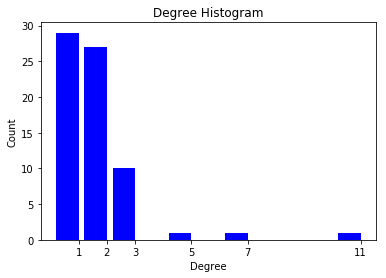

In [50]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline 

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items());

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg]);
ax.set_xticklabels(deg);

In [51]:
degreeCount

Counter({11: 1, 7: 1, 5: 1, 3: 10, 2: 27, 1: 29})

In [52]:
n_edges

68

In [58]:
token_types = set()

with open(filename, 'r') as f:
    try:
        for idx, line in enumerate(f):
            data = json.loads(line[:-6]+"]")
            for r in data:
                if type(r) == int:
                    break
                token_types.add(r['type'])
            #break
    except:
        print(idx,line)

2843 [ { "id":0, "type":"Program", "children":[1,3,20,25,61] }, { "id":1, "type":"ExpressionStatement", "children":[2] }, { "id":2, "type":"LiteralString", "value":"use strict" }, { "id":3, "type":"VariableDeclaration", "children":[4,8,12,16] }, { "id":4, "type":"VariableDeclarator", "value":"jsonFile", "children":[5] }, { "id":5, "type":"CallExpression", "children":[6,7] }, { "id":6, "type":"Identifier", "value":"require" }, { "id":7, "type":"LiteralString", "value":"jsonfile" }, { "id":8, "type":"VariableDeclarator", "value":"fs", "children":[9] }, { "id":9, "type":"CallExpression", "children":[10,11] }, { "id":10, "type":"Identifier", "value":"require" }, { "id":11, "type":"LiteralString", "value":"fs" }, { "id":12, "type":"VariableDeclarator", "value":"mkdir", "children":[13] }, { "id":13, "type":"CallExpression", "children":[14,15] }, { "id":14, "type":"Identifier", "value":"require" }, { "id":15, "type":"LiteralString", "value":"./mkdir" }, { "id":16, "type":"VariableDeclarator",

In [2]:
token_types = {'ArrayAccess',
 'ArrayExpression',
 'AssignmentExpression',
 'BinaryExpression',
 'BlockStatement',
 'BreakStatement',
 'CallExpression',
 'CatchClause',
 'ConditionalExpression',
 'ContinueStatement',
 'DoWhileStatement',
 'EmptyStatement',
 'ExpressionStatement',
 'ForInStatement',
 'ForStatement',
 'FunctionDeclaration',
 'FunctionExpression',
 'Identifier',
 'IfStatement',
 'LabeledStatement',
 'LiteralBoolean',
 'LiteralNull',
 'LiteralNumber',
 'LiteralRegExp',
 'LiteralString',
 'LogicalExpression',
 'MemberExpression',
 'NewExpression',
 'ObjectExpression',
 'Program',
 'Property',
 'ReturnStatement',
 'SequenceExpression',
 'SwitchCase',
 'SwitchStatement',
 'ThisExpression',
 'ThrowStatement',
 'TryStatement',
 'UnaryExpression',
 'UpdateExpression',
 'VariableDeclaration',
 'VariableDeclarator',
 'WhileStatement'}

In [4]:
for k in token_types:
    print(k.lower())
    

assignmentexpression
literalregexp
binaryexpression
switchcase
updateexpression
literalnull
throwstatement
trystatement
variabledeclarator
identifier
program
ifstatement
expressionstatement
callexpression
functionexpression
dowhilestatement
labeledstatement
unaryexpression
functiondeclaration
emptystatement
arrayaccess
whilestatement
objectexpression
literalboolean
newexpression
memberexpression
catchclause
continuestatement
conditionalexpression
forinstatement
thisexpression
forstatement
property
returnstatement
arrayexpression
sequenceexpression
blockstatement
breakstatement
literalstring
literalnumber
logicalexpression
switchstatement
variabledeclaration


In [54]:
var_map

{'18': 'test',
 '20': 'test',
 '24': 'enterFunc',
 '28': 'printBugNumber',
 '29': 'BUGNUMBER',
 '32': 'printStatus',
 '33': 'summary',
 '36': 'jit',
 '40': '__proto__',
 '42': '✖',
 '46': 'f',
 '50': 'eval',
 '54': 'f',
 '57': 'jit',
 '61': 'reportCompare',
 '62': 'expect',
 '63': 'actual',
 '64': 'summary',
 '67': 'exitFunc'}